In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv("Mumbai.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,WS50M,WD50M,QV2M,PRECTOTCORR
0,2011,4,1,5,21.56,3.52,23.38,14.65,0.0
1,2011,4,1,6,22.55,3.10,34.41,14.65,0.0
2,2011,4,1,7,25.80,2.93,12.96,13.43,0.0
3,2011,4,1,8,29.21,3.33,349.85,10.44,0.0
4,2011,4,1,9,32.30,3.71,333.38,8.06,0.0
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,24.76,1.01,286.19,16.78,0.0
87668,2021,4,1,1,24.58,0.67,274.71,16.91,0.0
87669,2021,4,1,2,24.36,0.41,256.76,17.03,0.0
87670,2021,4,1,3,24.09,0.21,213.11,17.03,0.0


In [3]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<32]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
WS50M          0.0
WD50M          0.0
QV2M           0.0
PRECTOTCORR    0.0
dtype: float64

In [5]:
print(numerical_feature)

['YEAR', 'MO', 'DY', 'HR', 'T2M', 'WS50M', 'WD50M', 'QV2M', 'PRECTOTCORR']


In [6]:
# def randomsampleimputation(df, variable):
#     df[variable]=df[variable]
#     random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
#     random_sample.index=df[df[variable].isnull()].index
#     df.loc[df[variable].isnull(),variable]=random_sample

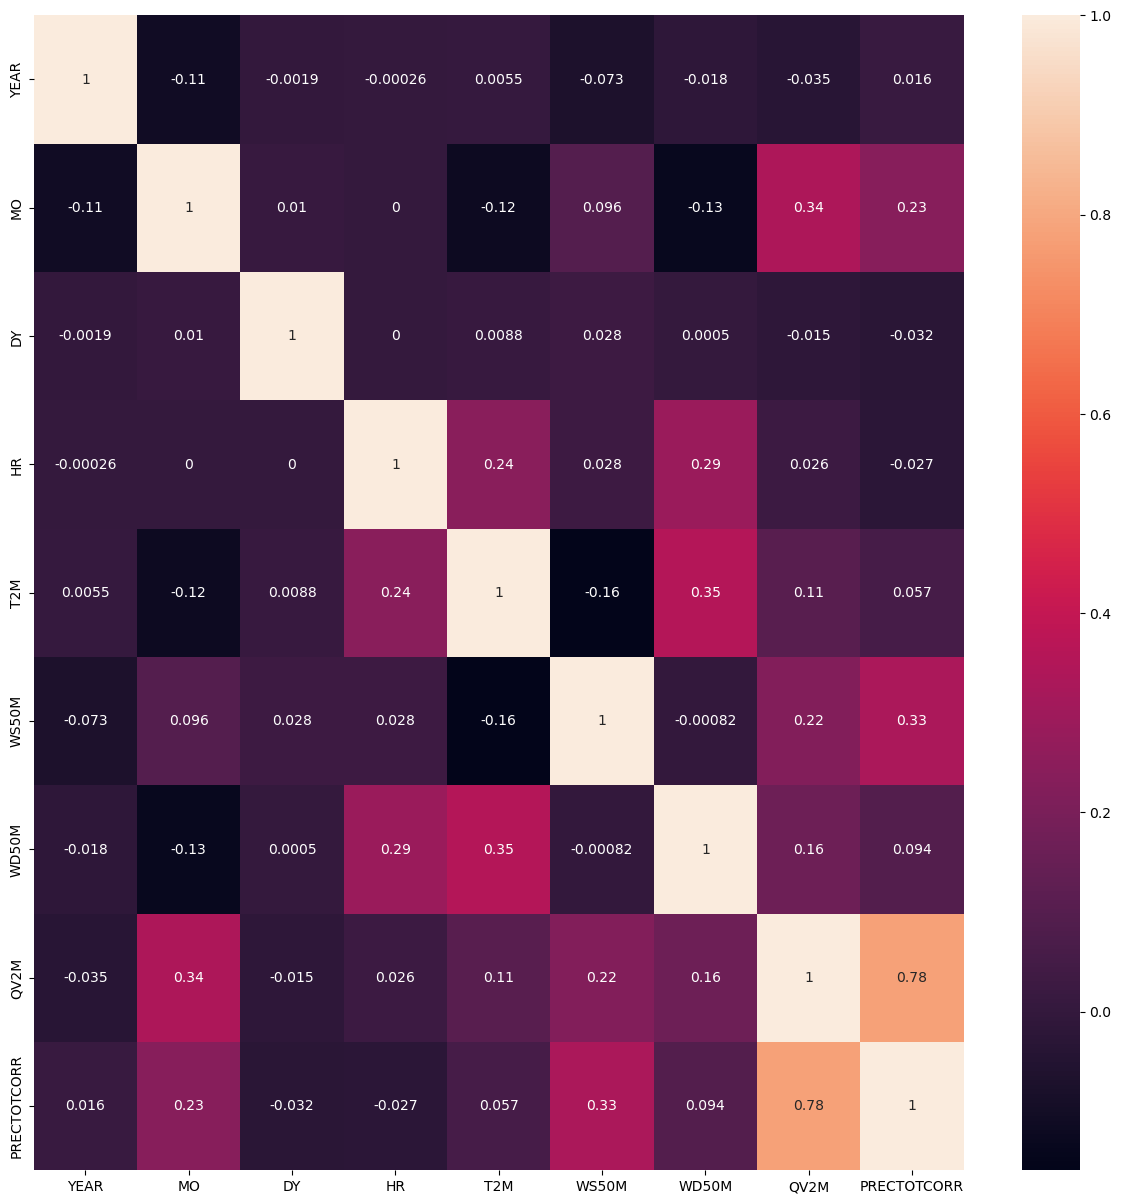

In [7]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [8]:
data=df.copy()

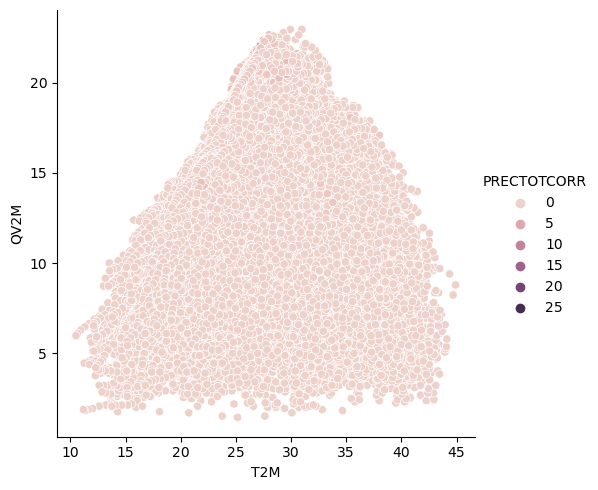

In [9]:
sns.relplot(x='T2M',y='QV2M',hue='PRECTOTCORR',data=data)
#QV :Humedity

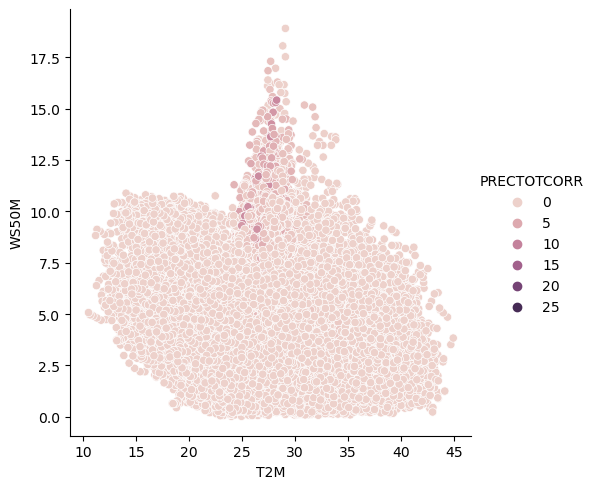

In [10]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

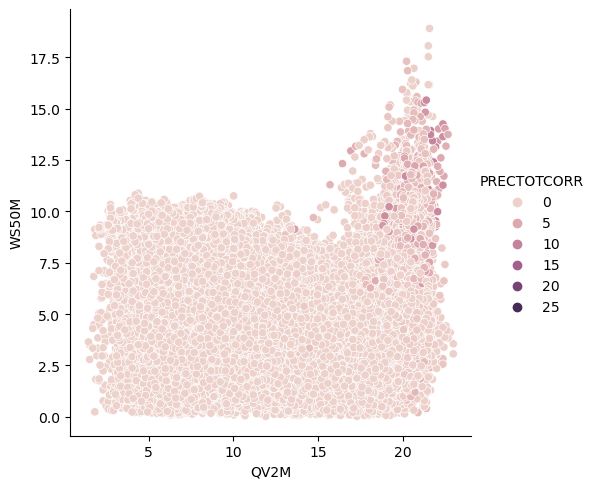

In [11]:
sns.relplot(x='QV2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


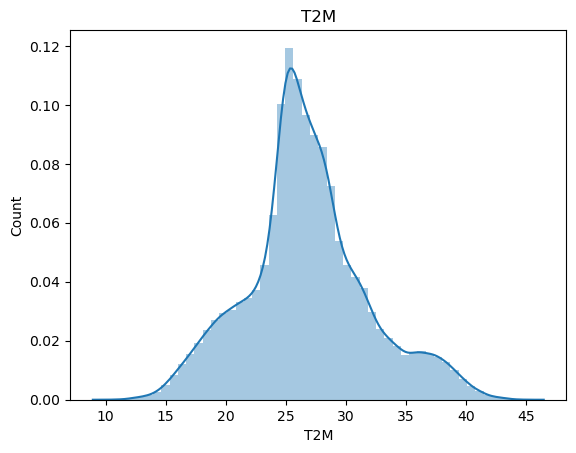

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


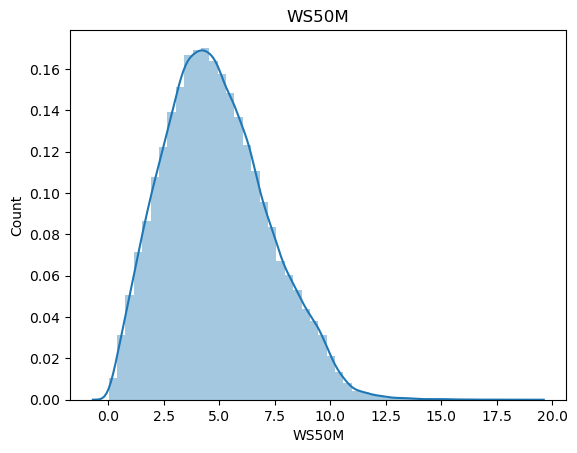

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


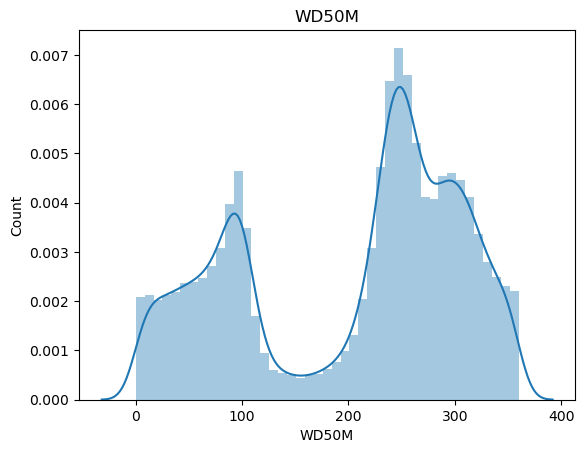

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


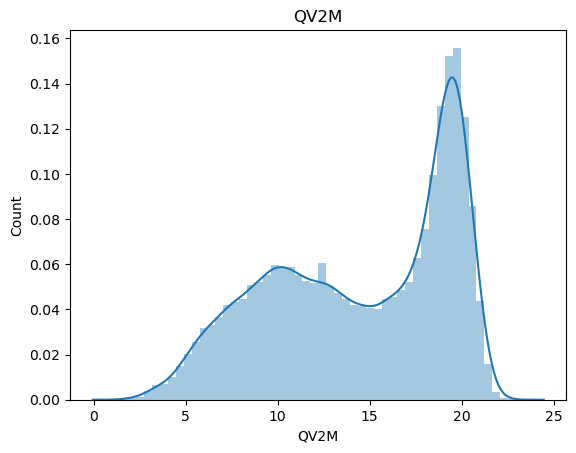

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


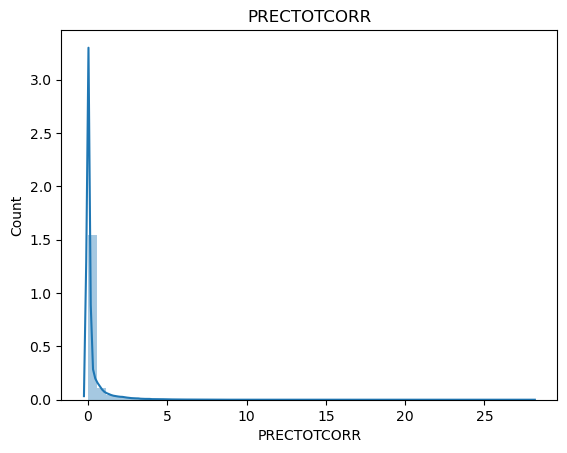

<Figure size 1500x1500 with 0 Axes>

In [12]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

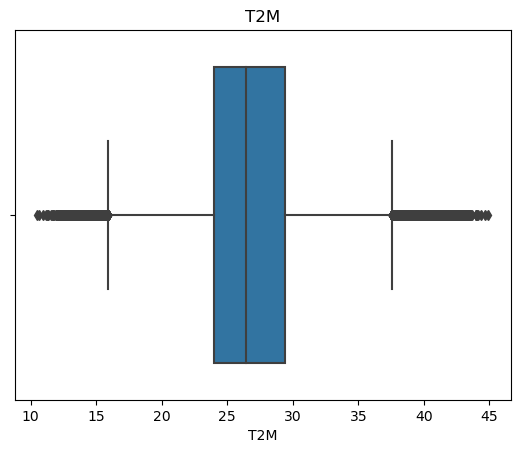

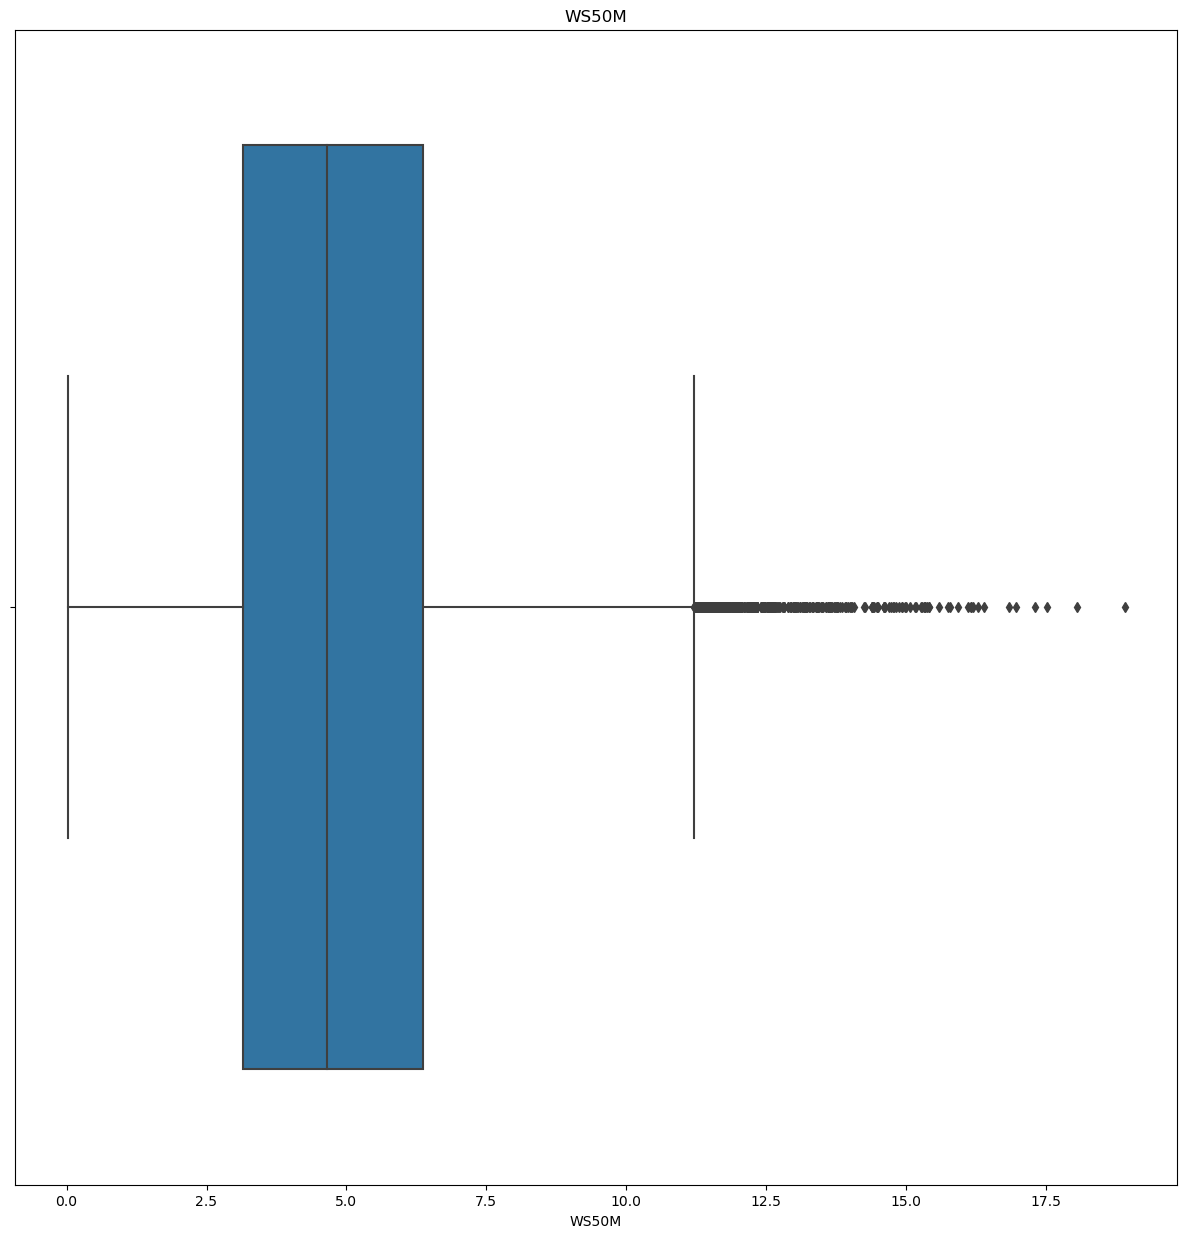

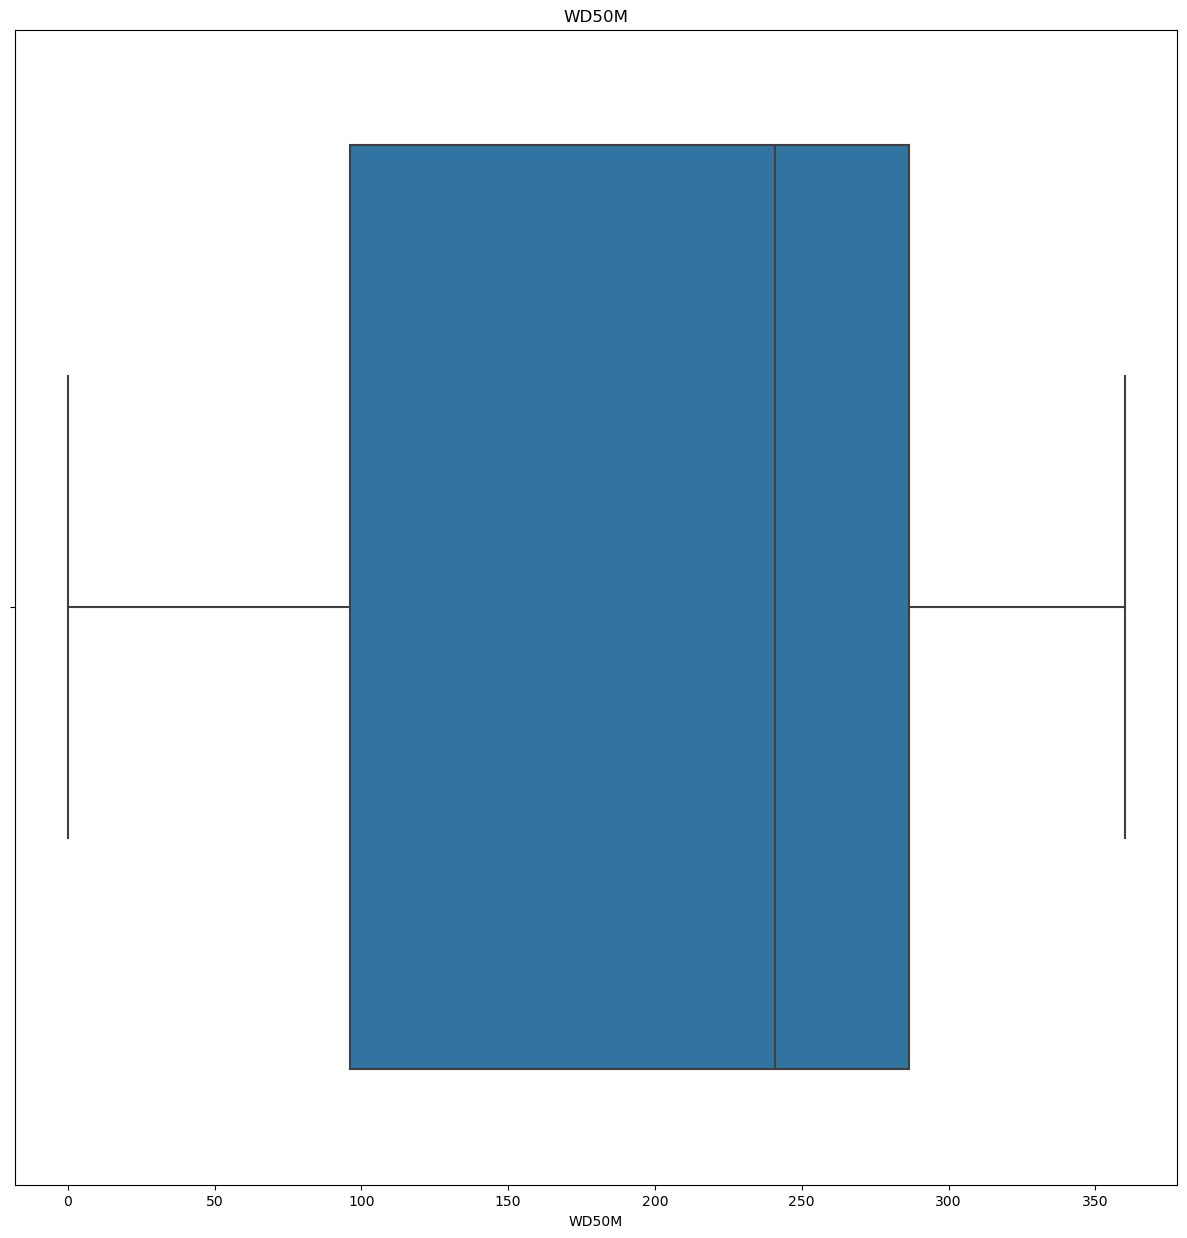

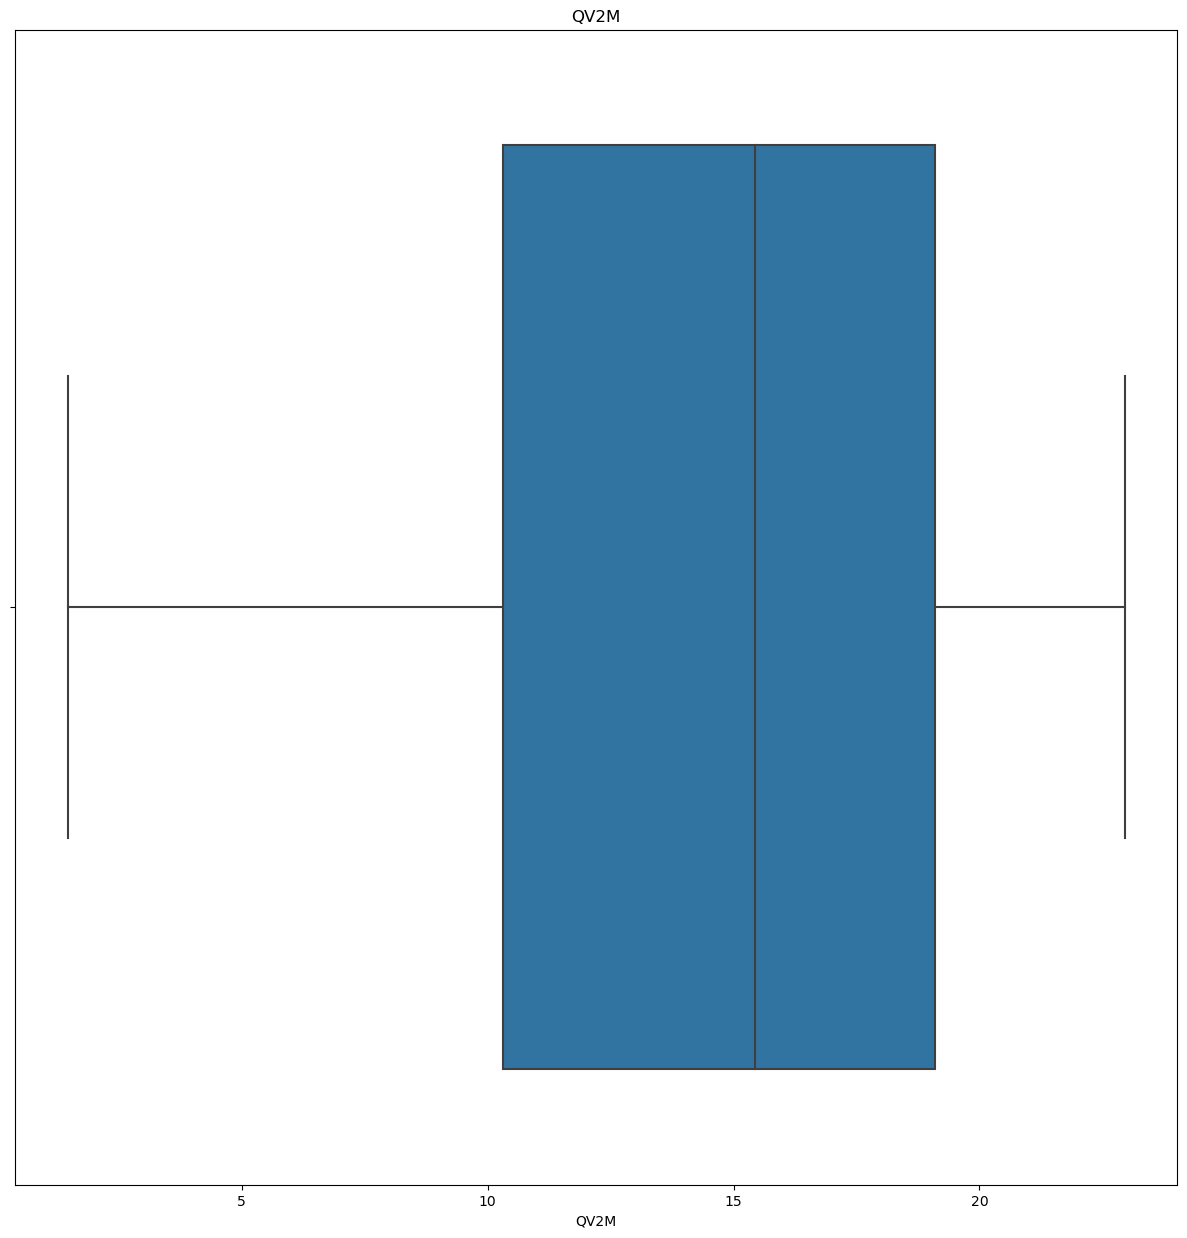

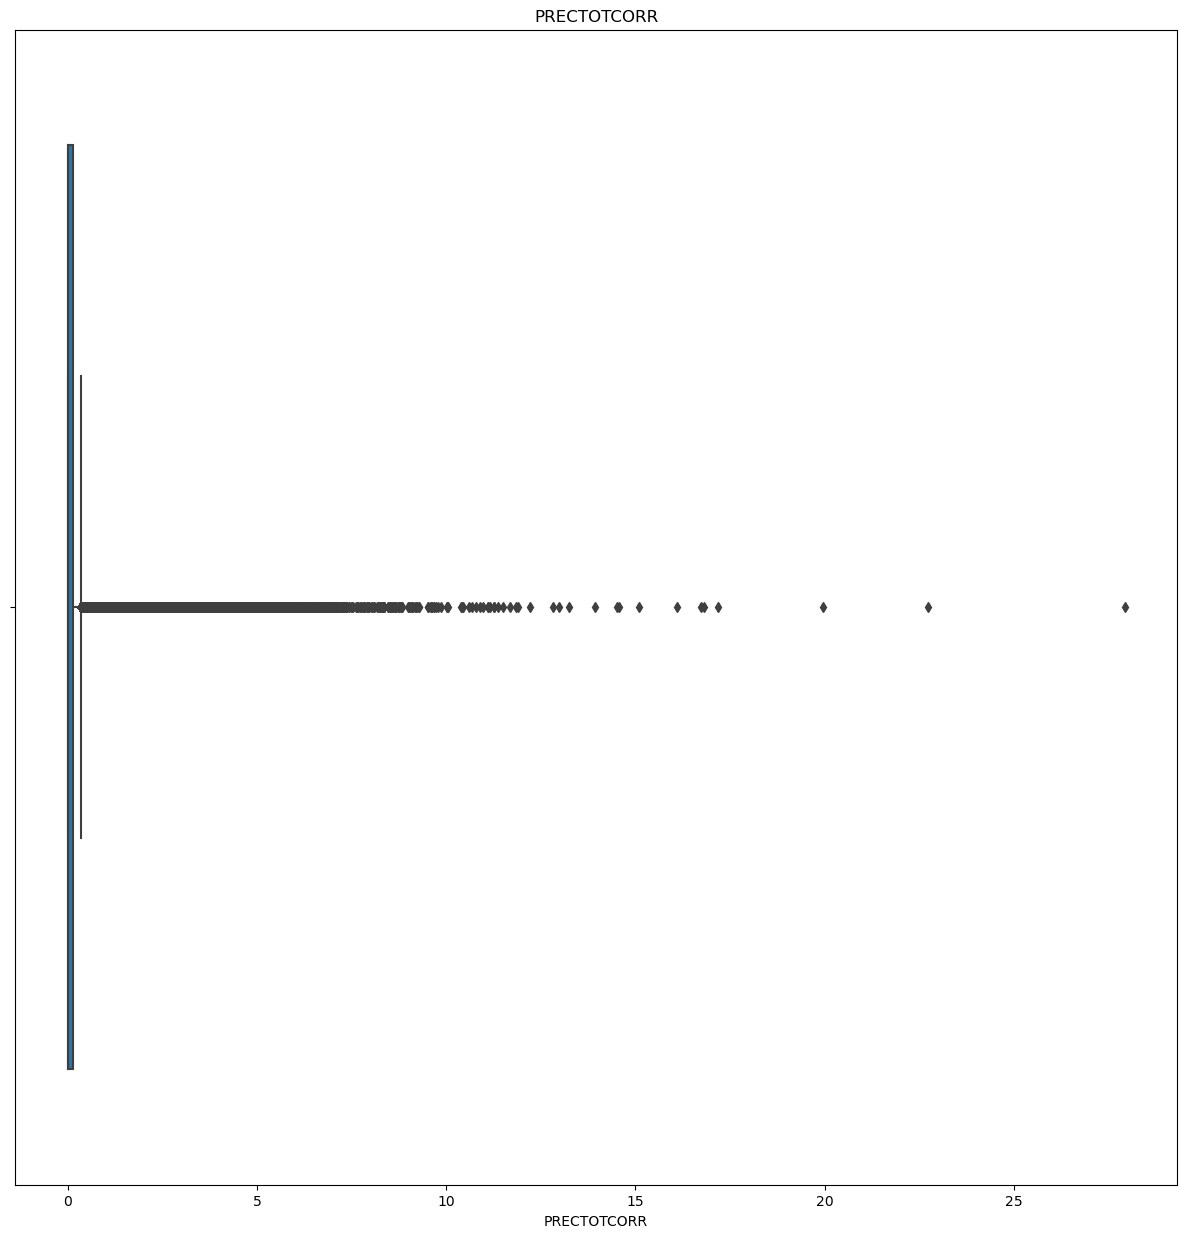

<Figure size 1500x1500 with 0 Axes>

In [13]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [14]:
d=df.copy()

In [15]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
print(d["WS50M"].unique())
print(type(d["WS50M"].unique()))

[21.56 22.55 25.8  ... 40.39 13.97 42.96]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 4.000e-02 5.000e-02 3.000e-02 2.000e-02 4.300e-01
 6.700e-01 1.020e+00 1.270e+00 1.260e+00 8.800e-01 5.600e-01 5.100e-01
 1.100e-01 6.000e-02 7.000e-02 1.600e-01 2.600e-01 2.800e-01 2.300e-01
 3.300e-01 3.900e-01 3.700e-01 4.800e-01 7.400e-01 7.000e-01 3.000e-01
 4.100e-01 5.000e-01 6.800e-01 9.200e-01 1.190e+00 1.430e+00 1.700e+00
 1.930e+00 1.960e+00 1.740e+00 1.560e+00 2.390e+00 2.230e+00 1.950e+00
 2.320e+00 2.820e+00 2.450e+00 2.240e+00 2.100e+00 1.420e+00 1.410e+00
 1.570e+00 1.790e+00 1.660e+00 1.810e+00 2.170e+00 2.430e+00 2.380e+00
 2.310e+00 2.620e+00 2.550e+00 2.560e+00 3.130e+00 3.880e+00 4.720e+00
 4.680e+00 6.200e+00 7.090e+00 7.420e+00 7.050e+00 6.100e+00 4.170e+00
 1.970e+00 1.080e+00 8.600e-01 8.500e-01 7.900e-01 8.100e-01 1.110e+00
 1.670e+00 2.250e+00 2.580e+00 2.610e+00 2.080e+00 1.880e+00 1.910e+00
 1.440e+00 2.290e+00 3.150e+00 3.540e+00 3.500e+00 3.180e+00 2.650e+00
 2.180e+00 

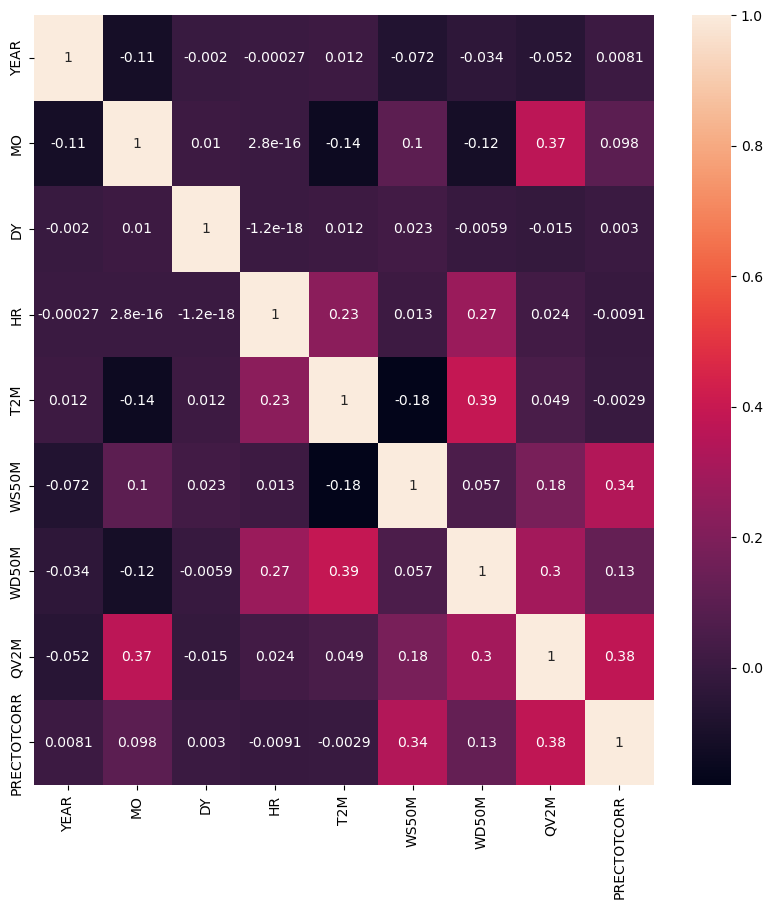

In [16]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [17]:
def qq_plots(d, variable):
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

T2M


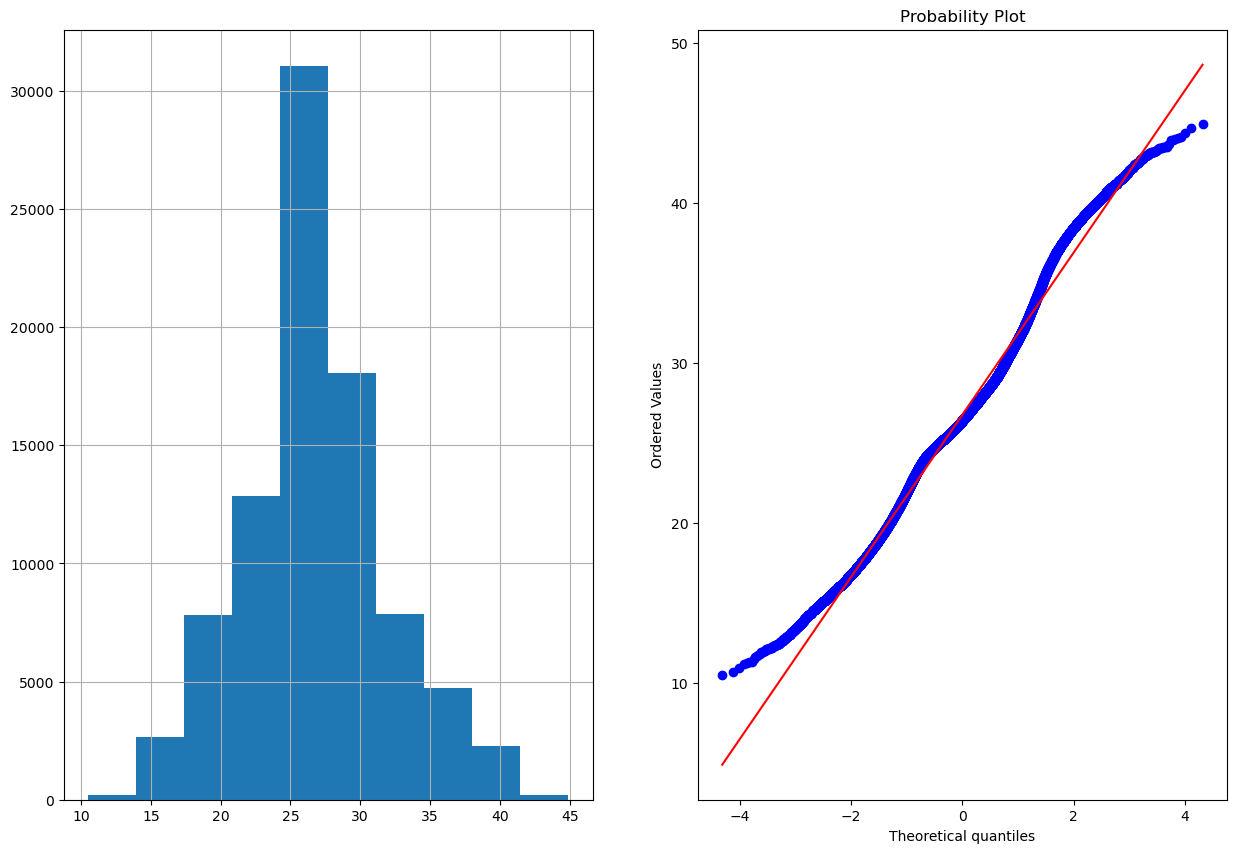

WS50M


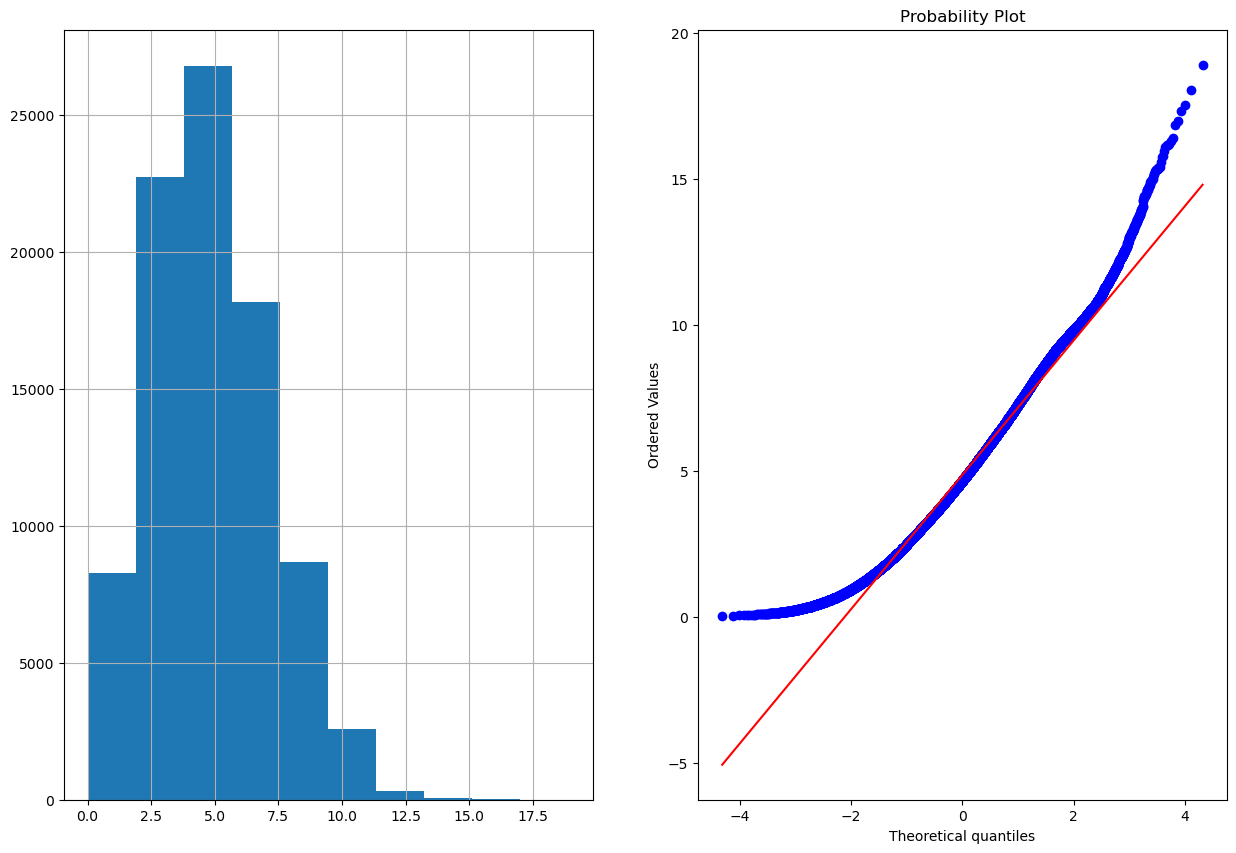

WD50M


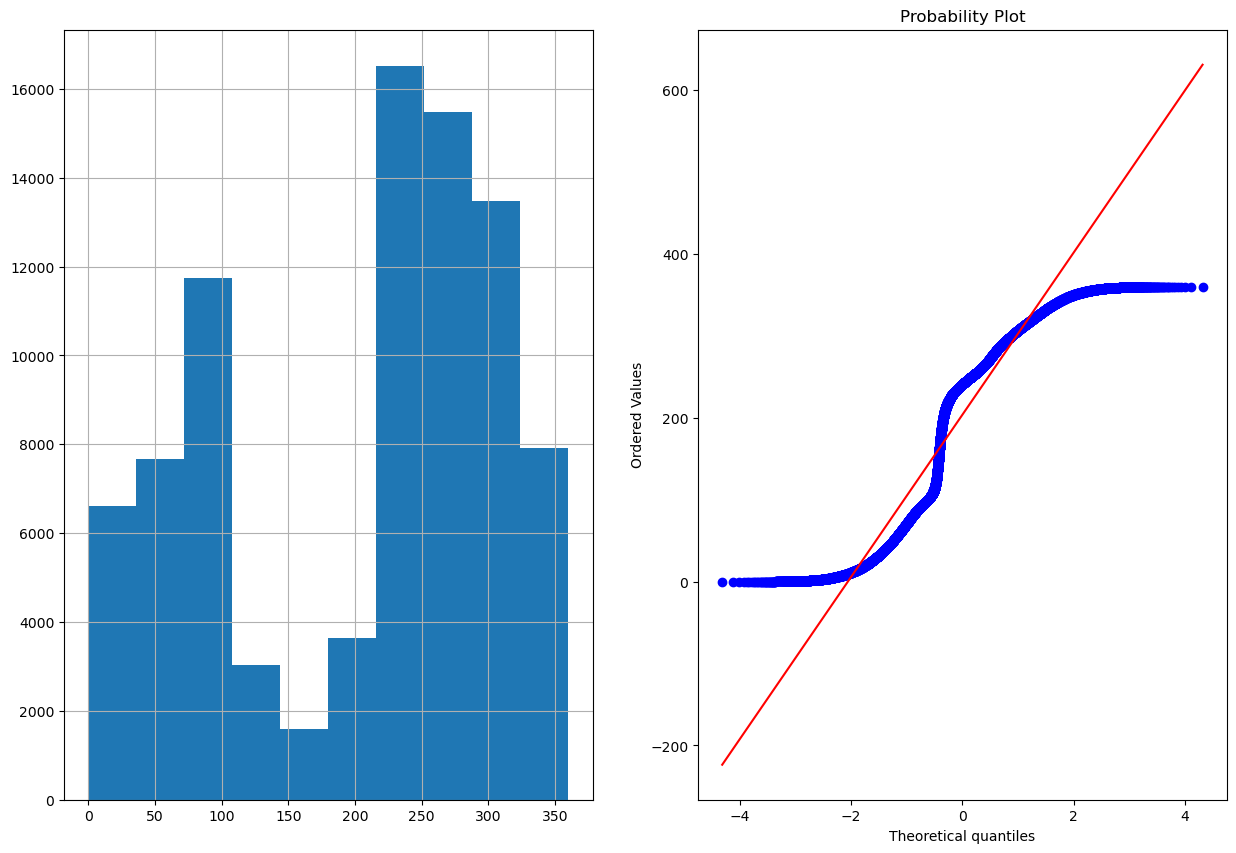

QV2M


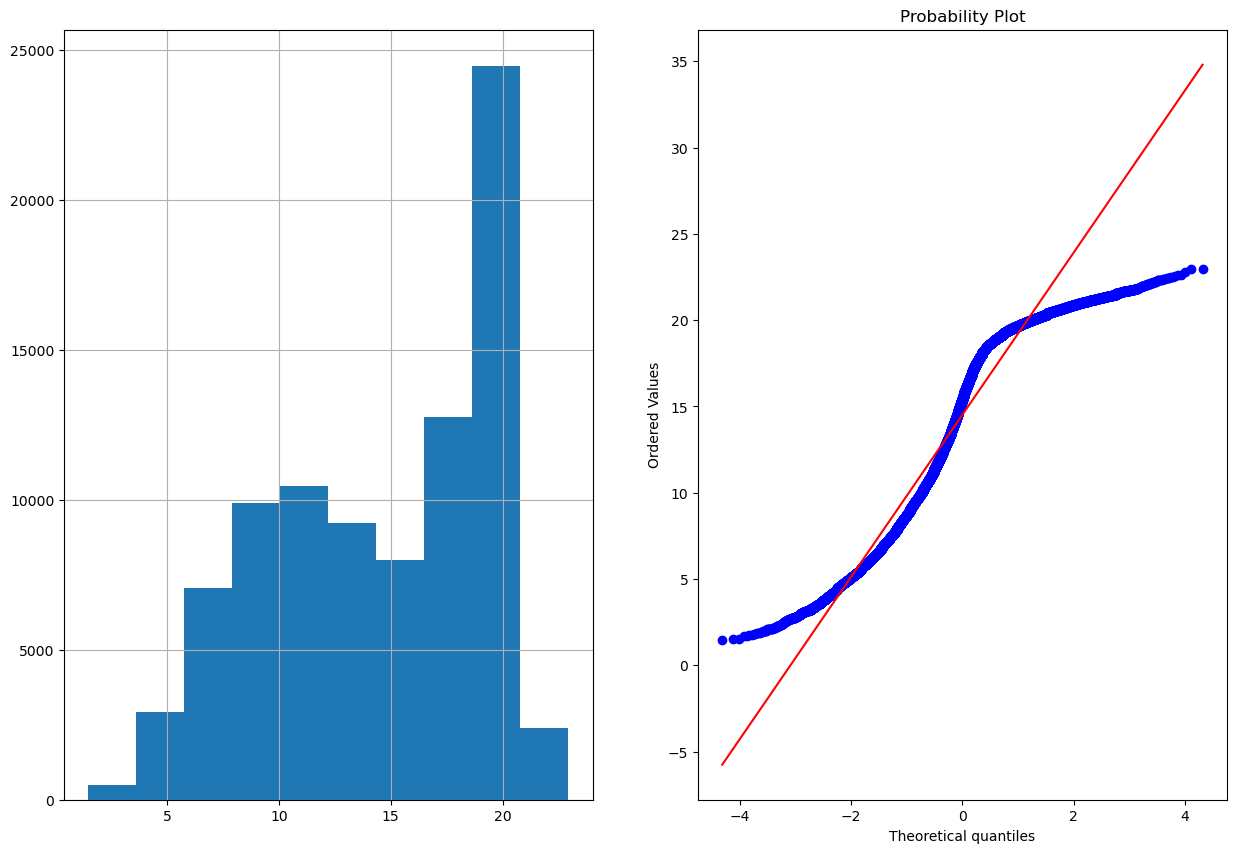

PRECTOTCORR


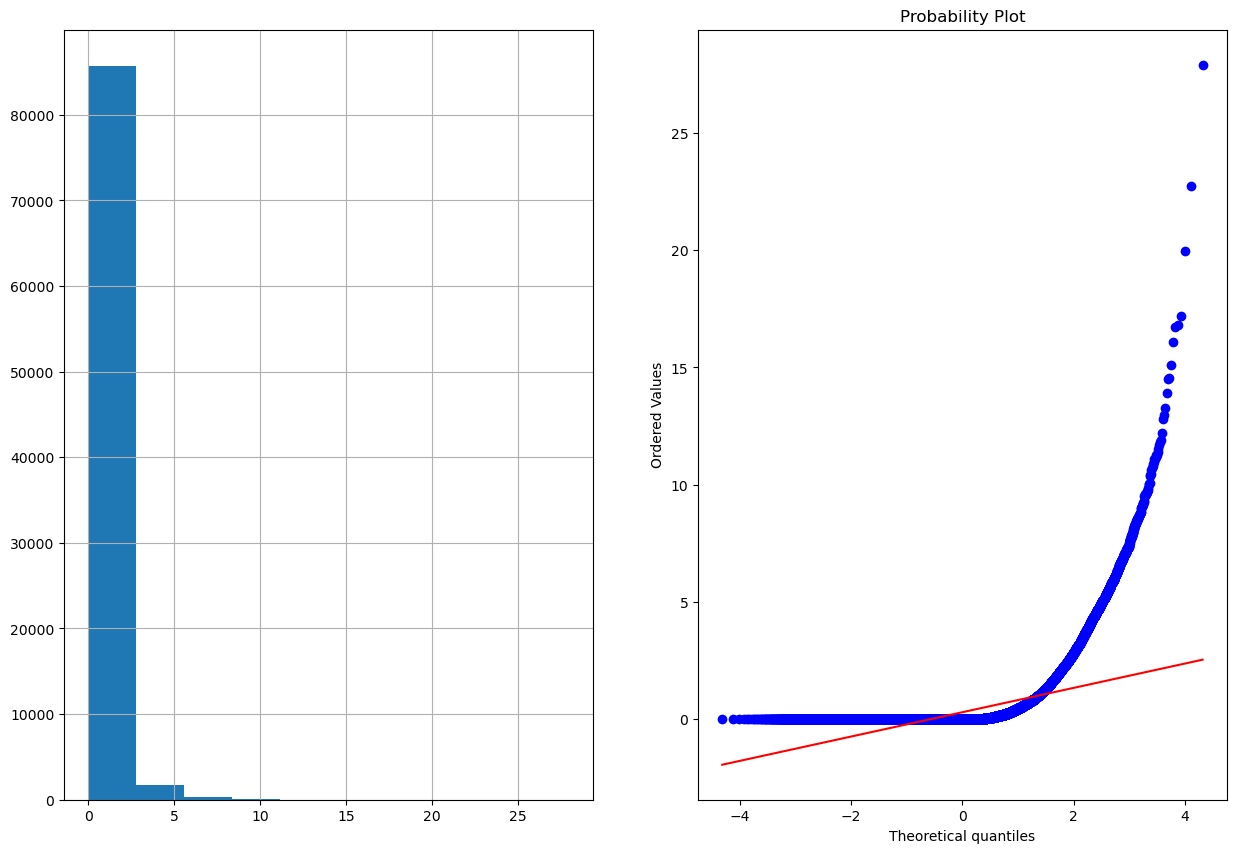

In [18]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [19]:
d.PRECTOTCORR.unique()

array([0.000e+00, 1.000e-02, 4.000e-02, 5.000e-02, 3.000e-02, 2.000e-02,
       4.300e-01, 6.700e-01, 1.020e+00, 1.270e+00, 1.260e+00, 8.800e-01,
       5.600e-01, 5.100e-01, 1.100e-01, 6.000e-02, 7.000e-02, 1.600e-01,
       2.600e-01, 2.800e-01, 2.300e-01, 3.300e-01, 3.900e-01, 3.700e-01,
       4.800e-01, 7.400e-01, 7.000e-01, 3.000e-01, 4.100e-01, 5.000e-01,
       6.800e-01, 9.200e-01, 1.190e+00, 1.430e+00, 1.700e+00, 1.930e+00,
       1.960e+00, 1.740e+00, 1.560e+00, 2.390e+00, 2.230e+00, 1.950e+00,
       2.320e+00, 2.820e+00, 2.450e+00, 2.240e+00, 2.100e+00, 1.420e+00,
       1.410e+00, 1.570e+00, 1.790e+00, 1.660e+00, 1.810e+00, 2.170e+00,
       2.430e+00, 2.380e+00, 2.310e+00, 2.620e+00, 2.550e+00, 2.560e+00,
       3.130e+00, 3.880e+00, 4.720e+00, 4.680e+00, 6.200e+00, 7.090e+00,
       7.420e+00, 7.050e+00, 6.100e+00, 4.170e+00, 1.970e+00, 1.080e+00,
       8.600e-01, 8.500e-01, 7.900e-01, 8.100e-01, 1.110e+00, 1.670e+00,
       2.250e+00, 2.580e+00, 2.610e+00, 2.080e+00, 

In [20]:
d1=d.copy()

In [21]:

d1=d1.PRECTOTCORR.map({0:1})

In [22]:
d2=d1.replace(np.nan, 0)

In [23]:
d2.unique()

array([1., 0.])

In [24]:
d3=d['T2M']

In [25]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)

,T2M,PRECTOTCORR
0,21.56,1.0
1,22.55,1.0
2,25.80,1.0
3,29.21,1.0
4,32.30,1.0
...,...,...
87667,24.76,1.0
87668,24.58,1.0
87669,24.36,1.0
87670,24.09,1.0


In [26]:
d5=d['HR']

In [27]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)

,T2M,PRECTOTCORR,HR
0,21.56,1.0,5
1,22.55,1.0,6
2,25.80,1.0,7
3,29.21,1.0,8
4,32.30,1.0,9
...,...,...,...
87667,24.76,1.0,0
87668,24.58,1.0,1
87669,24.36,1.0,2
87670,24.09,1.0,3


In [28]:
d7=d['DY']

In [29]:
d8=d['MO']

In [30]:
d9=d['YEAR']

In [31]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)

,T2M,PRECTOTCORR,HR,DY
0,21.56,1.0,5,1
1,22.55,1.0,6,1
2,25.80,1.0,7,1
3,29.21,1.0,8,1
4,32.30,1.0,9,1
...,...,...,...,...
87667,24.76,1.0,0,1
87668,24.58,1.0,1,1
87669,24.36,1.0,2,1
87670,24.09,1.0,3,1


In [32]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)

,T2M,PRECTOTCORR,HR,DY,MO
0,21.56,1.0,5,1,4
1,22.55,1.0,6,1,4
2,25.80,1.0,7,1,4
3,29.21,1.0,8,1,4
4,32.30,1.0,9,1,4
...,...,...,...,...,...
87667,24.76,1.0,0,1,4
87668,24.58,1.0,1,1,4
87669,24.36,1.0,2,1,4
87670,24.09,1.0,3,1,4


In [33]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,21.56,1.0,5,1,4,2011
1,22.55,1.0,6,1,4,2011
2,25.80,1.0,7,1,4,2011
3,29.21,1.0,8,1,4,2011
4,32.30,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,24.76,1.0,0,1,4,2021
87668,24.58,1.0,1,1,4,2021
87669,24.36,1.0,2,1,4,2021
87670,24.09,1.0,3,1,4,2021


In [34]:
d13=d['QV2M'].copy()

In [35]:
d14 = pd.concat([d12, d13], axis=1, join='inner')



In [36]:
d15=d['WS50M'].copy()

In [37]:
d16=d['WD50M'].copy()

In [38]:
d17 = pd.concat([d14, d15], axis=1, join='inner')



In [39]:
d18 = pd.concat([d17, d16], axis=1, join='inner')

display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,QV2M,WS50M,WD50M
0,21.56,1.0,5,1,4,2011,14.65,3.52,23.38
1,22.55,1.0,6,1,4,2011,14.65,3.10,34.41
2,25.80,1.0,7,1,4,2011,13.43,2.93,12.96
3,29.21,1.0,8,1,4,2011,10.44,3.33,349.85
4,32.30,1.0,9,1,4,2011,8.06,3.71,333.38
...,...,...,...,...,...,...,...,...,...
87667,24.76,1.0,0,1,4,2021,16.78,1.01,286.19
87668,24.58,1.0,1,1,4,2021,16.91,0.67,274.71
87669,24.36,1.0,2,1,4,2021,17.03,0.41,256.76
87670,24.09,1.0,3,1,4,2021,17.03,0.21,213.11


In [40]:
d18.to_csv('Mumbai-1.csv')

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

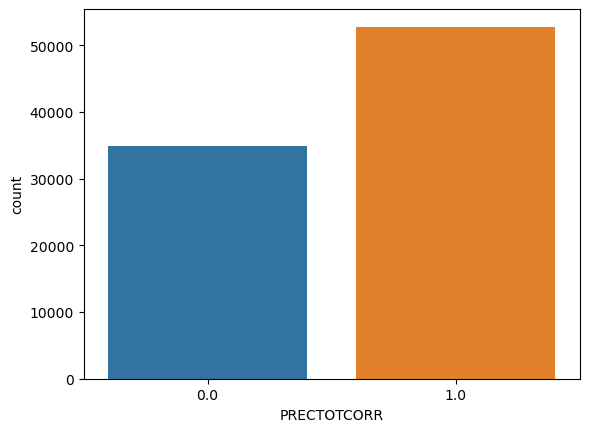

In [41]:
sns.countplot(d18["PRECTOTCORR"])
